In [1]:
#import libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import the csv file

In [4]:
killa = pd.read_csv('Killa2.csv')

In [5]:
killa.head(5)

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [6]:
#1. straighten out the transaction column to a table with 7rows

In [7]:
killa['transaction'].loc[0]

"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['1992-11-10 00:00:00']}"

In [8]:
type(killa['transaction'].loc[0])

str

In [9]:
#convert str to dict

In [10]:
killa['transaction'] = killa['transaction'].apply(eval)

In [11]:
#transform the dict to a table 

In [12]:
transaction = pd.json_normalize(killa['transaction'])
transaction.head(5)

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [13]:
#joining the firstname and lastname from the killa dataframe with the transaction table

In [14]:
df = pd.concat([killa[['First Name', 'Last Name']], transaction], axis = 1)

In [15]:
df

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [16]:
columns = ['first_name', 'last_name', 'id', 'date', 'amount', 'mode', 'channel', 'bank_name', 'dob']

df.columns = columns

In [17]:
df.head(5)

,first_name,last_name,id,date,amount,mode,channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [18]:
#2. Identifing the top 5 predominat ages in the dataset

In [19]:
type(df['dob'].loc[0])

list

In [20]:
#convert the list to string 

In [21]:
df['dob'] = df['dob'].apply(lambda dob: ''.join(dob))

In [22]:
df

,first_name,last_name,id,date,amount,mode,channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a
...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,n/a
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,n/a
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a


In [23]:
#replace all n/a values in dob to NaN

In [24]:
df['dob'] = df['dob'].replace('n/a', np.nan)

In [25]:
df['dob']

0      1992-11-10 00:00:00
1                      NaN
2      1992-01-01 00:00:00
3      1981-01-07 00:00:00
4                      NaN
              ...         
122                    NaN
123                    NaN
124                    NaN
125                    NaN
126                    NaN
Name: dob, Length: 127, dtype: object

In [26]:
#convert to datetime

In [27]:
type(df['dob'].loc[0])

str

In [28]:
df['dob'] = pd.to_datetime(df['dob'])

In [29]:
df['dob'].loc[0].year

1992

In [30]:
#create a new column year and age

In [31]:
df['year'] = df['dob'].apply(lambda dob: dob.year)

In [32]:
df['age'] = 2021 - df['year']

In [33]:
#drop the column year, we dont need it

In [34]:
df = df.drop('year', axis =1)
df.head()

,first_name,last_name,id,date,amount,mode,channel,bank_name,dob,age
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10,29.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT,NaN
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01,29.0
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07,40.0
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT,NaN


In [35]:
#top 5 ages

In [36]:
df['age'].value_counts().head(5)

29.0    6
41.0    5
32.0    4
45.0    4
40.0    3
Name: age, dtype: int64

In [37]:
#3. banks with the largest share of transactions

In [38]:
df['bank_name'].value_counts()

ABank    32
GBank    32
QBank    32
KBank    31
Name: bank_name, dtype: int64

In [39]:
#4. show distribution of channels used on transactions

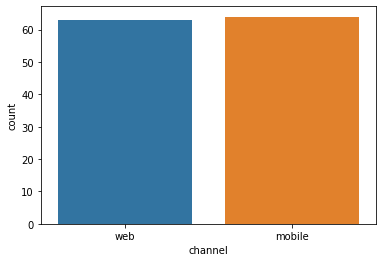

In [40]:
sns.countplot(df['channel'])